In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set file path
file_path = r"E:\UNU-MERIT\Thesis\ClimateMobility\climate-migration-model\data\raw\international_migration_flow.csv"
df_raw = pd.read_csv(file_path)

In [2]:
# === 1. Preliminary check of data ===
print("data shape:", df_raw.shape)

print("data type:\n", df_raw.dtypes)

print("missing value:\n", df_raw.isnull().sum())
missing = df_raw.isnull().mean().sort_values(ascending=False) # check missing ratio
print("missing ratio:\n",missing)
df = df_raw.dropna(subset=['country_from', 'country_to']).copy() # Delete records with missing values

print("Basic statistics on migration:\n", df['num_migrants'].describe())


data shape: (1563154, 4)
data type:
 country_from       object
country_to         object
migration_month    object
num_migrants        int64
dtype: object
missing value:
 country_from       8640
country_to         8640
migration_month       0
num_migrants          0
dtype: int64
missing ratio:
 country_from       0.005527
country_to         0.005527
migration_month    0.000000
num_migrants       0.000000
dtype: float64
Basic statistics on migration:
 count    1.545874e+06
mean     7.678771e+01
std      9.029347e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      1.200000e+01
max      1.639370e+05
Name: num_migrants, dtype: float64


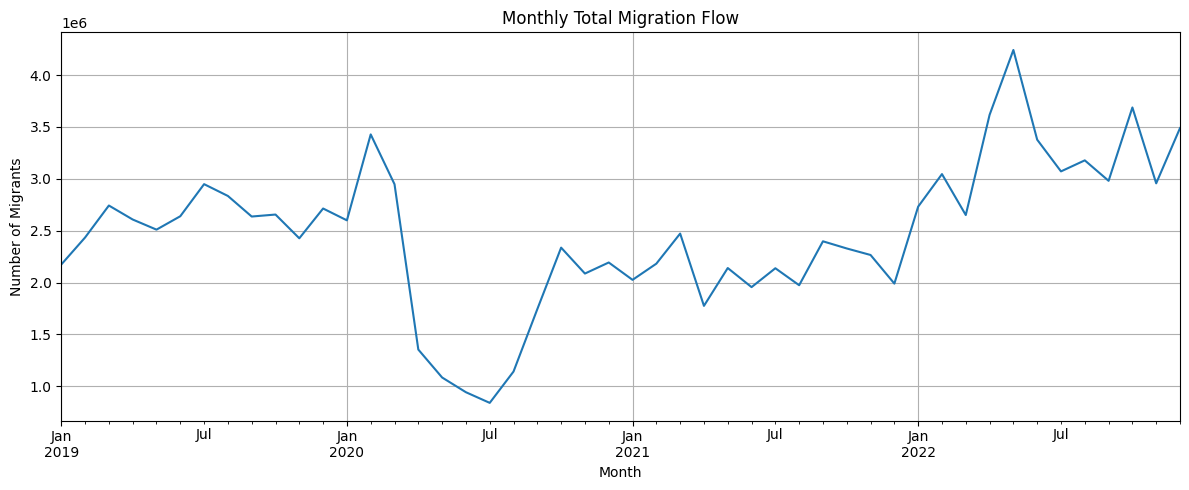

In [4]:
# === 2. Convert date and extract year, month ===
df['migration_month'] = pd.to_datetime(df['migration_month'])
df['year'] = df['migration_month'].dt.year
df['month'] = df['migration_month'].dt.month

# === 3. Rename columns for clarity ===
df.rename(columns={
    'country_from': 'origin',
    'country_to': 'destination',
    'num_migrants': 'flow'
}, inplace=True)

# === 4. Create log-transformed migration flow to be used as dependent variable in regression===
df['log_flow'] = np.log1p(df['flow'])

# === 5. Save cleaned migration data for later merging with other datasets ===
output_path = r"E:\UNU-MERIT\Thesis\ClimateMobility\climate-migration-model\data\processed\migration_flow_cleaned.csv"
df.to_csv(output_path, index=False)

# === 6. Trends in total monthly global migration ===
monthly_total = df.groupby('migration_month')['flow'].sum()
plt.figure(figsize=(12, 5))
monthly_total.plot()
plt.title("Monthly Total Migration Flow")
plt.xlabel("Month")
plt.ylabel("Number of Migrants")
plt.grid(True)
plt.tight_layout()
plt.savefig("plot_monthly_total_flow.png")

更换国家代码从ISO2到ISO3

In [7]:
import pandas as pd

# 读取 Excel 文件
df_code = pd.read_csv('../data/raw/countries_codes_245.csv')

# 显示所有列名
print(df_code.columns.tolist())


['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code', 'Latitude (average)', 'Longitude (average)']


In [1]:
import pandas as pd

# 读取国家代码映射表
code_map = pd.read_csv('../data/raw/countries_codes_263.csv')
iso2_to_iso3 = dict(zip(code_map['Alpha-2 code'], code_map['Alpha-3 code']))

# 读取 migration 数据
mig = pd.read_csv('../data/processed/migration_flow_cleaned.csv')

# 替换 origin 和 destination 字段为 iso3
mig['origin_iso3'] = mig['origin'].map(iso2_to_iso3)
mig['destination_iso3'] = mig['destination'].map(iso2_to_iso3)

# 检查未匹配上的国家代码
print("未匹配上的 origin 国家代码:", mig[mig['origin_iso3'].isnull()]['origin'].unique())
print("未匹配上的 destination 国家代码:", mig[mig['destination_iso3'].isnull()]['destination'].unique())


未匹配上的 origin 国家代码: []
未匹配上的 destination 国家代码: []
